In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('food (1).csv')
x = data.iloc[:,1:3].values
print(x)
y = data.iloc[:,3].values
print(y)

[[10  9]
 [ 1  4]
 [10  1]
 [ 7 10]
 [ 3 10]
 [ 1  1]
 [ 2  8]
 [ 3  1]
 [ 8  5]
 [ 3  7]
 [ 1  9]
 [ 3  6]
 [ 7  3]
 [10  7]
 [ 2  3]]
['fruit' 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'vegetable'
 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'fruit' 'fruit'
 'protein']


In [8]:
le = LabelEncoder()
y_new = le.fit_transform(y)
print(y_new)
x_train,x_test,y_train,y_test = train_test_split(x,y_new,test_size=.25,random_state=50)
print(y_test)

[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]
[0 0 2 2]


In [11]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print("-----------------------Test Class-----------------\n",y_test)
print("\n---------------------------Predict Class-----------\n",y_predict)
print(knn.predict_proba(x_test))
print(accuracy_score(y_test,y_predict,normalize=False))


-----------------------Test Class-----------------
 [0 0 2 2]

---------------------------Predict Class-----------
 [0 1 2 2]
[[0.6 0.2 0.2]
 [0.4 0.6 0. ]
 [0.  0.4 0.6]
 [0.4 0.  0.6]]
3


[[1 1 0]
 [0 0 0]
 [0 0 2]]


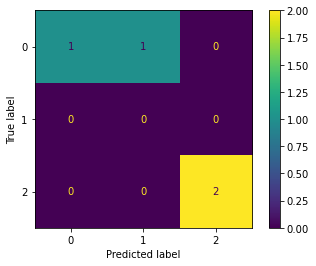

In [12]:
cm = confusion_matrix(y_test,y_predict,normalize = None,labels=knn.classes_)
print(cm)
cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()
